In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams['figure.facecolor'] = 'w'
plt.style.use('dark_background')
import seaborn as sns
import random
from scipy.special import beta as beta_function

In [2]:
d0 = np.array([1,1,1,1,1])
p0 = d0/sum(d0)
print(p0)

d1 = np.array([4,3,2,1,0])
p1 = d1/sum(d1)
print(p1)

d2 = np.array([0,1,2,3,4])
p2 = d1*d2/sum(d1*d2)
print(p2)

d3 = np.array([0,1,2,3,4])
p3 = d1*d2*d3/sum(d1*d2*d3)
print(p3)

d4 = np.array([0,1,2,3,4])
# d4 = np.array([4,3,2,1,0])
p4 = d1*d2*d3*d4/sum(d1*d2*d3*d4)
print(p4)

[0.2 0.2 0.2 0.2 0.2]
[0.4 0.3 0.2 0.1 0. ]
[0.  0.3 0.4 0.3 0. ]
[0.   0.15 0.4  0.45 0.  ]
[0.         0.06521739 0.34782609 0.58695652 0.        ]


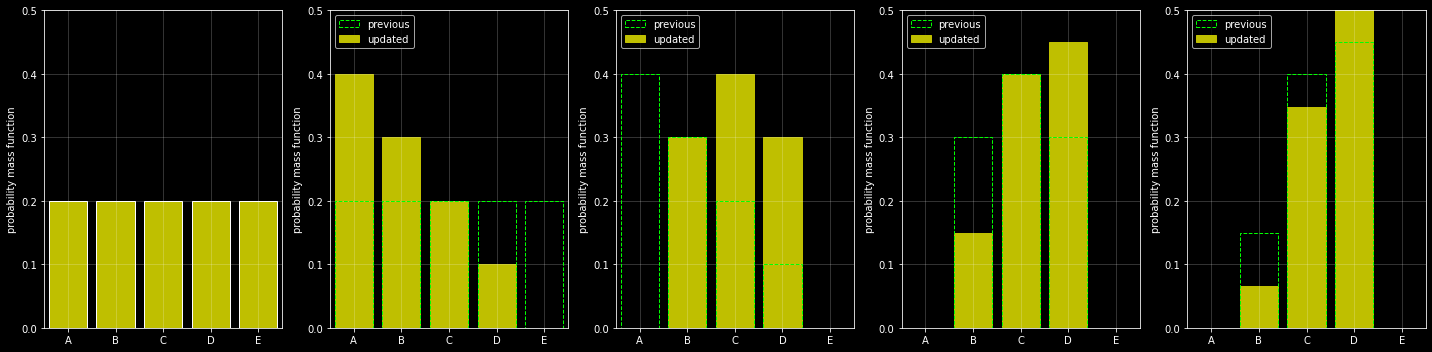

In [5]:
fig, axs = plt.subplots(figsize=(20, 5), ncols=5)
xmin, xmax = -0.5, 4.5
ymin, ymax = 0, 0.5
x_axis = ['A', 'B', 'C', 'D', 'E']
ps = [p0, p1, p2, p3, p4]
for i, ax in enumerate(axs.flat):
    if i == 0:
        ax.bar(x_axis, ps[i], color='y', ec='w')
    else:
        ax.bar(x_axis, ps[i-1], ls='--', ec= 'lime', fc='None', label='previous', zorder=10)
        ax.bar(x_axis, ps[i], color='y', ec='y', label='updated')
        ax.legend(loc='upper left')
    ax.set(#xlabel='pen distribution', 
           ylabel='probability mass function', #title='', 
           xlim=[xmin,xmax], ylim=[ymin,ymax])
    ax.grid(lw=1, alpha=0.2, zorder=0)
    
plt.tight_layout()
# fig.savefig('../plots/pen-draw-distributions-0-3.pdf', bbox_inches='tight')
# fig.savefig('../plots/pen-draw-distributions-0-4.pdf', bbox_inches='tight')

# Continuous case: globe

In [10]:
def likelihood(W, L, p):
    return np.math.factorial(W+L) / (np.math.factorial(W) * np.math.factorial(L)) * p**W * (1-p)**L

def likelihood_water(W, N, p):
    return np.math.factorial(N) / (np.math.factorial(W) * np.math.factorial(N-W)) * p**W * (1-p)**(N-W)

def posterior_water(W, N, p, prior):
    post_propto = prior * likelihood_water(W=W, N=N, p=p)
    normalization = np.math.factorial(N) / (np.math.factorial(W) * np.math.factorial(N-W)) * beta_function(W+1, N-W+1)
    posterior = post_propto / normalization
    return posterior

In [18]:
n_samples = 10000
# p = np.random.random(n_samples)
p_axis = np.linspace(0, 1, n_samples)
prob_prior_flat = np.repeat(1, n_samples)

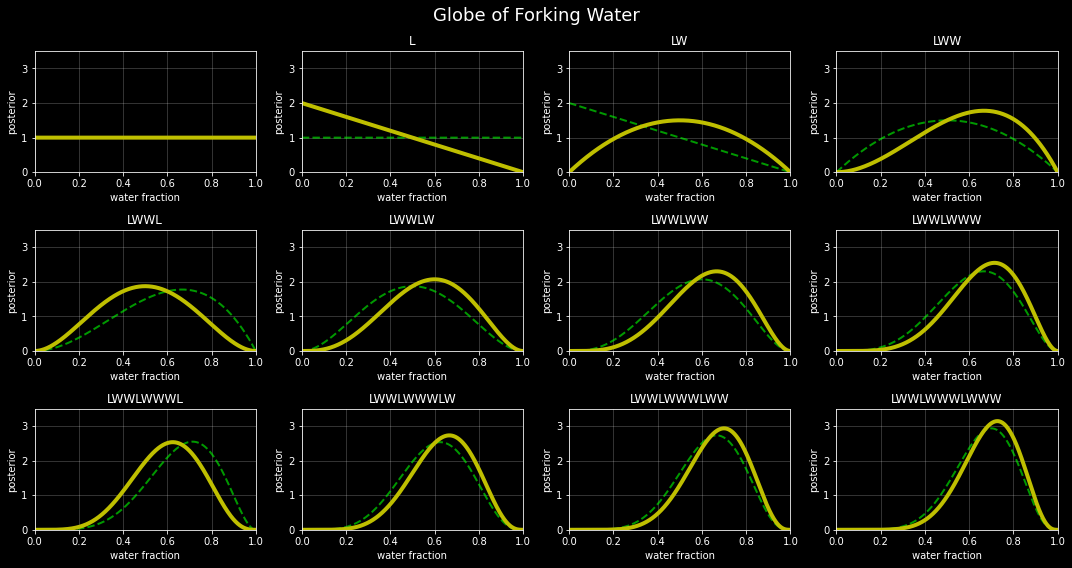

In [35]:
fig, axs = plt.subplots(figsize=(15, 8), ncols=4, nrows=3)
plt.suptitle('Globe of Forking Water', fontsize=18)
seq = ['L', 'W', 'W', 'L', 'W', 'W', 'W', 'L', 'W', 'W', 'W']
xmin, xmax = 0, 1
ymin, ymax = 0, 3.5
cnt_all, cnt_water = 0, 0
sequence = ''
for idx, ax in enumerate(axs.flat):
    if idx != 0:
        sample = seq[idx-1]
        if sample == 'W':
            cnt_water += 1
        cnt_all += 1
        sequence += sample
        ax.plot(p_axis, last_posterior, c='lime', ls='--', lw=2, alpha=0.6)
    last_posterior = posterior_water(W=cnt_water, N=cnt_all, p=p_axis, prior=prob_prior_flat)
    ax.plot(p_axis, last_posterior, c='y', lw=4, alpha=1)
    ax.set(xlabel='water fraction', ylabel='posterior', title=f'{sequence}', 
           xlim=[xmin,xmax], ylim=[ymin,ymax])
    ax.grid(lw=1, alpha=0.2, zorder=0)
plt.tight_layout()
# fig.savefig('../plots/Globe-Forking-Water-flat-prior.pdf', bbox_inches='tight')

In [5]:
seq

['L', 'W', 'W', 'L', 'W', 'W', 'W', 'L', 'W', 'W', 'W']

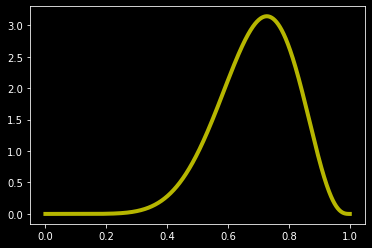

In [6]:
# np.mean(posterior_water(W=8, N=11, p=p_axis, prior=prob_prior))
plt.plot(p_axis, posterior_water(W=8, N=11, p=p_axis, prior=prob_prior_flat), c='y', lw=4, alpha=0.96);

In [104]:
last_posterior = posterior_water(W=8, N=11, p=p_axis, prior=prob_prior)
# np.argmean(last_posterior), last_posterior

In [105]:
p_axis[np.argwhere(last_posterior == np.percentile(last_posterior,50,method='nearest'))[0,0]]
# p_axis[np.argwhere(last_posterior == np.mean(last_posterior))]

0.42744274427442747

In [109]:
for x,y in zip(p_axis, last_posterior):
    # value = np.percentile(last_posterior,50)
    value = np.mean(last_posterior)
    if y >= value:
        print(x,y)
        break

0.5034503450345035 1.0004753348899886


In [7]:
def gaussian(mu, sigma, x):
    return np.exp(-(x-mu)**2/(2*sigma**2))

In [25]:
prob_prior_gaussian = gaussian(mu=0.5, sigma=0.2, x=p_axis)
prob_prior_beta22 = 5*p_axis*(1-p_axis)

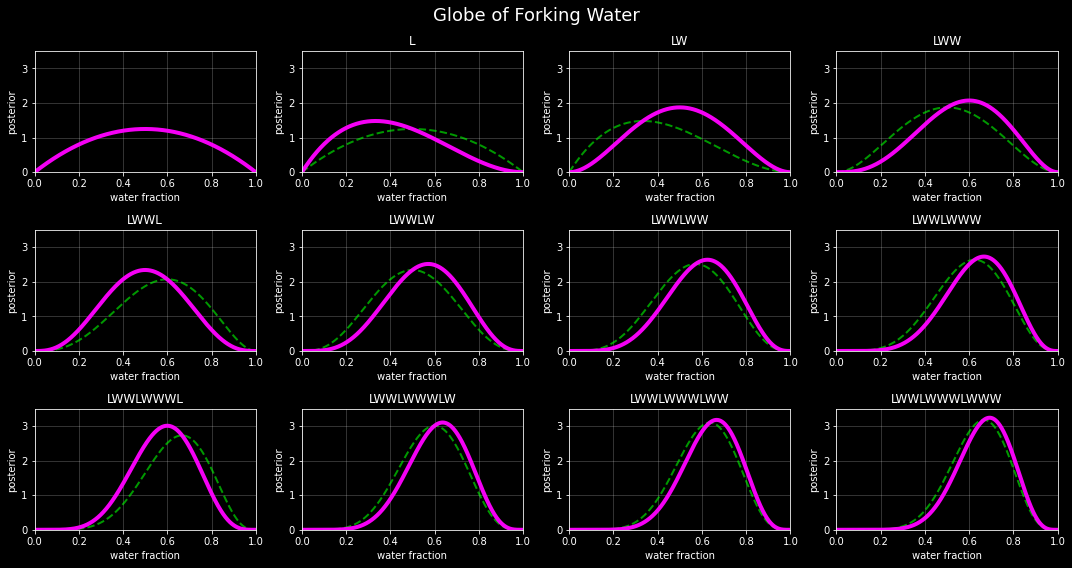

In [34]:
fig, axs = plt.subplots(figsize=(15, 8), ncols=4, nrows=3)
plt.suptitle('Globe of Forking Water', fontsize=18)
seq = ['L', 'W', 'W', 'L', 'W', 'W', 'W', 'L', 'W', 'W', 'W']
xmin, xmax = 0, 1
ymin, ymax = 0, 3.5
cnt_all, cnt_water = 0, 0
sequence = ''
for idx, ax in enumerate(axs.flat):
    if idx != 0:
        sample = seq[idx-1]
        if sample == 'W':
            cnt_water += 1
        cnt_all += 1
        sequence += sample
        ax.plot(p_axis, last_posterior, c='lime', ls='--', lw=2, alpha=0.6)
    last_posterior = posterior_water(W=cnt_water, N=cnt_all, p=p_axis, prior=prob_prior_beta22)
    # ax.plot(p_axis, prob_prior_gaussian, c='magenta', lw=4, alpha=0.96)
    ax.plot(p_axis, last_posterior, c='magenta', lw=4, alpha=0.96)
    ax.set(xlabel='water fraction', ylabel='posterior', title=f'{sequence}', 
           xlim=[xmin,xmax], ylim=[ymin,ymax])
    ax.grid(lw=1, alpha=0.2, zorder=0)
plt.tight_layout()
# fig.savefig('../plots/Globe-Forking-Water-beta22-prior.pdf', bbox_inches='tight')

In [12]:
np.percentile(last_posterior, 50)

0.1838185946641938

In [27]:
last_posterior_beta22_prior = posterior_water(W=8, N=11, p=p_axis, prior=prob_prior_beta22)
last_posterior_flat_prior = posterior_water(W=8, N=11, p=p_axis, prior=prob_prior_flat)

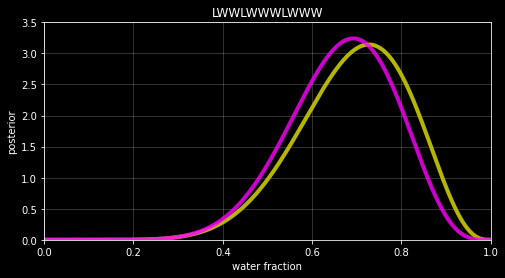

In [40]:
fig, ax = plt.subplots(figsize=(8, 4))
# plt.suptitle('Globe of Forking Water', fontsize=18)
# seq = ['L', 'W', 'W', 'L', 'W', 'W', 'W', 'L', 'W', 'W', 'W']
xmin, xmax = 0, 1
ymin, ymax = 0, 3.5
ax.plot(p_axis, last_posterior_flat_prior, c='y', lw=4, alpha=0.96)
ax.plot(p_axis, last_posterior_beta22_prior, c='magenta', lw=4, alpha=0.8)
ax.set(xlabel='water fraction', ylabel='posterior', title=f'{sequence}', 
       xlim=[xmin,xmax], ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0)
# fig.savefig('../plots/Globe-Forking-Water-final-posteriors.pdf', bbox_inches='tight')

In [15]:
p_axis[np.argwhere(last_posterior == np.percentile(last_posterior,50,method='nearest'))[0,0]]
# p_axis[np.argwhere(last_posterior == np.mean(last_posterior))]

0.8836883688368837

In [16]:
for x,y in zip(p_axis, last_posterior):
    # value = np.percentile(last_posterior,50)
    value = np.mean(last_posterior)
    if y >= value:
        print(x,y)
        break

0.45804580458045807 0.5974050613748286
